
--- Running Harris+ORB ---
Frame 0: Extracted 575 keypoints in 0.0193 seconds.


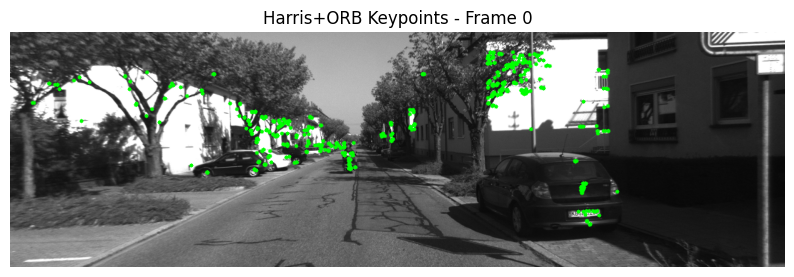

Frame 1: Extracted 352 keypoints in 0.0150 seconds.
  Matched 227 features between frame 0 and 1.


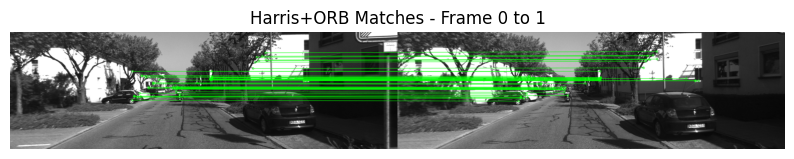

Frame 2: Extracted 440 keypoints in 0.0119 seconds.
  Matched 195 features between frame 1 and 2.
Frame 3: Extracted 536 keypoints in 0.0132 seconds.
  Matched 223 features between frame 2 and 3.
Frame 4: Extracted 309 keypoints in 0.0144 seconds.
  Matched 177 features between frame 3 and 4.
Frame 5: Extracted 259 keypoints in 0.0096 seconds.
  Matched 145 features between frame 4 and 5.
Frame 6: Extracted 511 keypoints in 0.0071 seconds.
  Matched 166 features between frame 5 and 6.
Frame 7: Extracted 471 keypoints in 0.0138 seconds.
  Matched 244 features between frame 6 and 7.
Frame 8: Extracted 467 keypoints in 0.0141 seconds.
  Matched 226 features between frame 7 and 8.
Frame 9: Extracted 399 keypoints in 0.0145 seconds.
  Matched 195 features between frame 8 and 9.
Frame 10: Extracted 155 keypoints in 0.0110 seconds.
  Matched 103 features between frame 9 and 10.
Frame 11: Extracted 467 keypoints in 0.0139 seconds.
  Matched 109 features between frame 10 and 11.
Frame 12: Extra

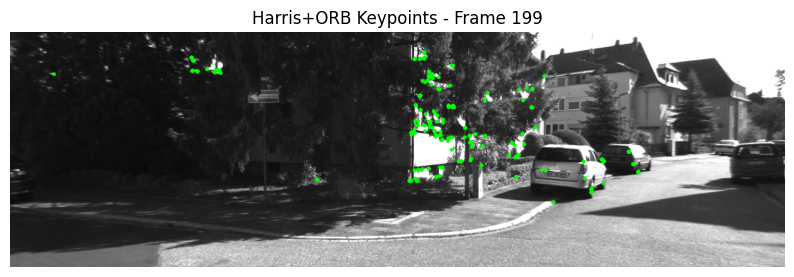

  Matched 137 features between frame 198 and 199.
Total processed frames for Harris+ORB: 200
Final Landmark Count for Harris+ORB: 346


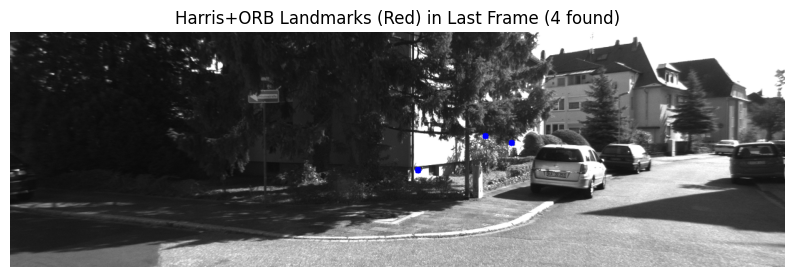


--- Running SIFT ---
Frame 0: Extracted 600 keypoints in 0.0593 seconds.


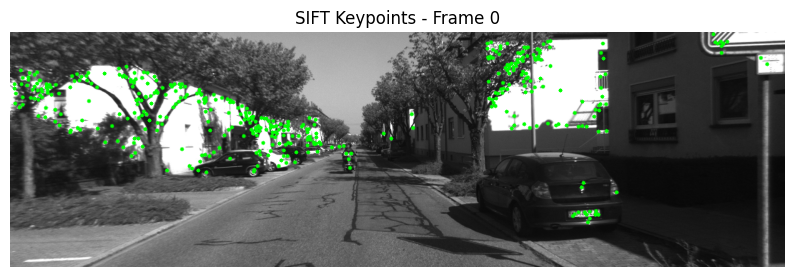

Frame 1: Extracted 600 keypoints in 0.0592 seconds.
  Matched 354 features between frame 0 and 1.


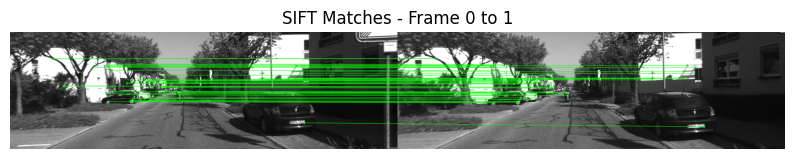

Frame 2: Extracted 601 keypoints in 0.0580 seconds.
  Matched 345 features between frame 1 and 2.
Frame 3: Extracted 600 keypoints in 0.0589 seconds.
  Matched 353 features between frame 2 and 3.
Frame 4: Extracted 601 keypoints in 0.0585 seconds.
  Matched 338 features between frame 3 and 4.
Frame 5: Extracted 601 keypoints in 0.0627 seconds.
  Matched 336 features between frame 4 and 5.
Frame 6: Extracted 600 keypoints in 0.0628 seconds.
  Matched 348 features between frame 5 and 6.
Frame 7: Extracted 600 keypoints in 0.0593 seconds.
  Matched 374 features between frame 6 and 7.
Frame 8: Extracted 600 keypoints in 0.0596 seconds.
  Matched 342 features between frame 7 and 8.
Frame 9: Extracted 600 keypoints in 0.0595 seconds.
  Matched 341 features between frame 8 and 9.
Frame 10: Extracted 601 keypoints in 0.0597 seconds.
  Matched 331 features between frame 9 and 10.
Frame 11: Extracted 600 keypoints in 0.0611 seconds.
  Matched 341 features between frame 10 and 11.
Frame 12: Extra

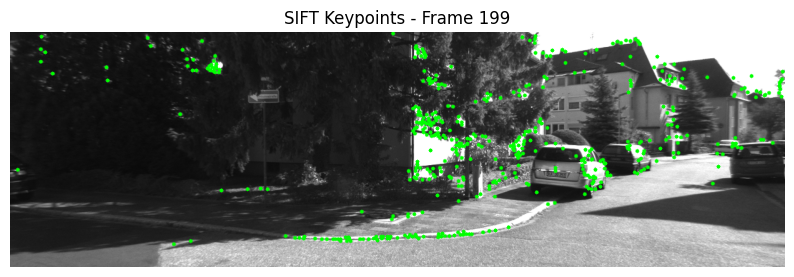

  Matched 334 features between frame 198 and 199.
Total processed frames for SIFT: 200
Final Landmark Count for SIFT: 344


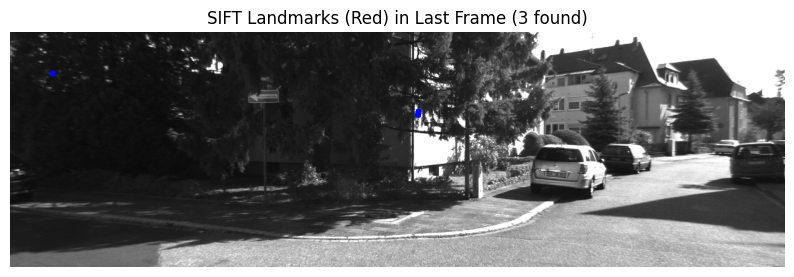


--- Running ORB ---
Frame 0: Extracted 612 keypoints in 0.0080 seconds.


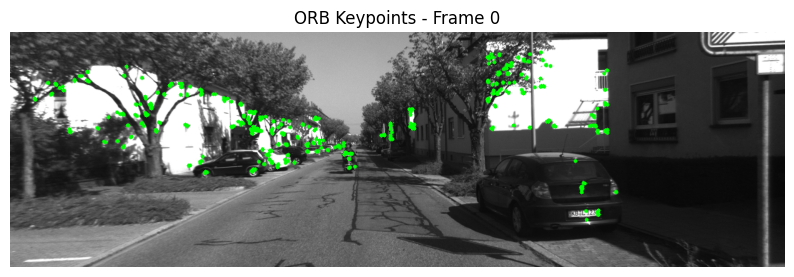

Frame 1: Extracted 608 keypoints in 0.0065 seconds.
  Matched 380 features between frame 0 and 1.


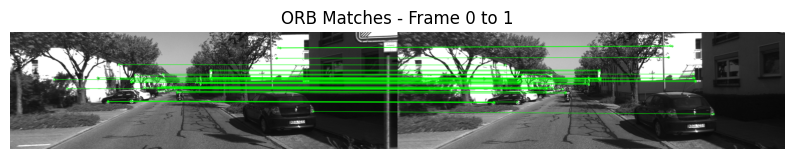

Frame 2: Extracted 613 keypoints in 0.0088 seconds.
  Matched 363 features between frame 1 and 2.
Frame 3: Extracted 608 keypoints in 0.0165 seconds.
  Matched 356 features between frame 2 and 3.
Frame 4: Extracted 612 keypoints in 0.0086 seconds.
  Matched 338 features between frame 3 and 4.
Frame 5: Extracted 609 keypoints in 0.0086 seconds.
  Matched 345 features between frame 4 and 5.
Frame 6: Extracted 606 keypoints in 0.0063 seconds.
  Matched 343 features between frame 5 and 6.
Frame 7: Extracted 610 keypoints in 0.0071 seconds.
  Matched 335 features between frame 6 and 7.
Frame 8: Extracted 611 keypoints in 0.0020 seconds.
  Matched 333 features between frame 7 and 8.
Frame 9: Extracted 611 keypoints in 0.0050 seconds.
  Matched 339 features between frame 8 and 9.
Frame 10: Extracted 607 keypoints in 0.0094 seconds.
  Matched 346 features between frame 9 and 10.
Frame 11: Extracted 612 keypoints in 0.0074 seconds.
  Matched 383 features between frame 10 and 11.
Frame 12: Extra

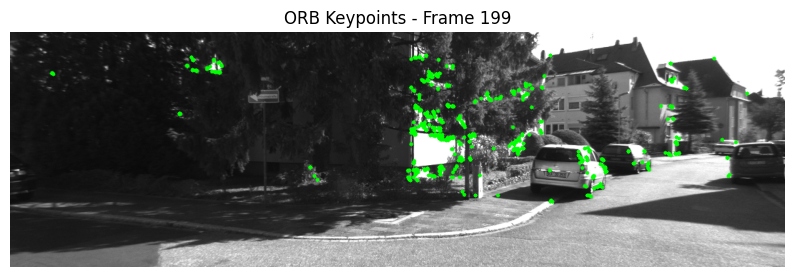

  Matched 333 features between frame 198 and 199.
Total processed frames for ORB: 200
Final Landmark Count for ORB: 426


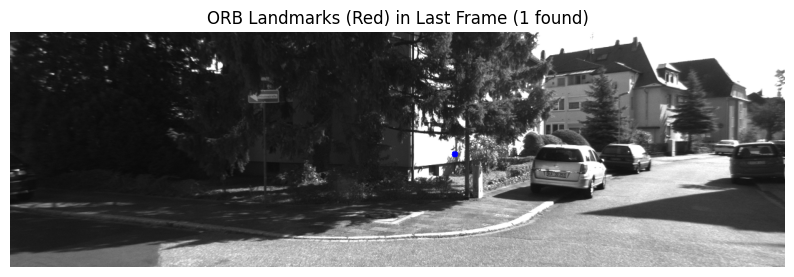


                 Performance Comparison Table                  
| Method     | Parameters                                                                    | Avg Runtime (s) | Avg Candidate Points | Matched Landmarks (Final) |
|------------|-------------------------------------------------------------------------------|-----------------|----------------------|---------------------------|
| Harris+ORB | nfeatures=600, block_size=2, ksize=3, k=0.04, threshold_ratio=0.40            | 0.0459          | 435.65               | 346                       |
| SIFT       | nfeatures=600, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=1.60 | 0.0590          | 600.16               | 344                       |
| ORB        | nfeatures=600, scaleFactor=1.2, nlevels=8, fastThreshold=20                   | 0.0071          | 609.49               | 426                       |

--- Analysis of Parameters and Performance ---
The choice of parameters significantly impacts the number of

In [10]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import os

# --- Helper Functions (No changes needed here) ---

def display_image(img, title="Image"):
    """Helper to display images in Jupyter/matplotlib."""
    # Convert BGR to RGB for matplotlib display
    if len(img.shape) == 3:
        img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else: # Grayscale image
        img_display = img
    plt.figure(figsize=(10, 8))
    plt.imshow(img_display)
    plt.title(title)
    plt.axis('off')
    plt.show()

def draw_keypoints(img, keypoints, color=(0, 255, 0), radius=3):
    """Draws keypoints on an image."""
    img_kp = np.copy(img)
    for kp in keypoints:
        x, y = int(kp.pt[0]), int(kp.pt[1])
        cv2.circle(img_kp, (x, y), radius, color, -1)
    return img_kp

def draw_matches(img1, kp1, img2, kp2, matches, color=(0, 255, 0), num_matches_to_draw=None):
    """
    Draws matches between two images.
    If num_matches_to_draw is specified, only draws that many best matches.
    """
    if num_matches_to_draw is not None:
        matches = matches[:num_matches_to_draw]
    
    return cv2.drawMatches(img1, kp1, img2, kp2, matches, None, 
                           flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, matchColor=color)

# --- 1. Feature Extraction Methods ---

def extract_harris_corners(image_path, block_size=2, ksize=3, k=0.04, threshold_ratio=1, nfeatures=500):
    """
    Extracts Harris Corners and uses ORB to compute descriptors.
    Parameters:
        image_path (str): Path to the image.
        block_size (int): Size of the neighborhood considered for corner detection.
        ksize (int): Aperture parameter for the Sobel operator.
        k (float): Harris detector free parameter.
        threshold_ratio (float): Ratio to determine the threshold for strong corners.
        nfeatures (int): The maximum number of keypoints to return.
    Returns:
        tuple: (list of cv2.KeyPoint, np.array of descriptors, runtime)
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return [], None, 0

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    start_time = time.time()
    
    # Calculate Harris Corner response
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    
    # Normalize and create a list of keypoints
    dst_norm = cv2.normalize(dst, None, 0, 255, cv2.NORM_MINMAX)
    dst_scaled = np.uint8(dst_norm)
    
    # Find all corners above a threshold
    corners = np.argwhere(dst_scaled > threshold_ratio * dst_scaled.max())
    
    keypoints = []
    for y, x in corners:
        # Create a cv2.KeyPoint object for each corner
        # The 'response' field is set to the Harris corner response for sorting
        keypoints.append(cv2.KeyPoint(float(x), float(y), 1.0, 0, dst[y, x]))

    # Sort keypoints by response and keep only the top `nfeatures`
    keypoints = sorted(keypoints, key=lambda x: x.response, reverse=True)
    if nfeatures > 0 and len(keypoints) > nfeatures:
        keypoints = keypoints[:nfeatures]
        
    # Create an ORB object to compute descriptors for the detected Harris keypoints
    orb = cv2.ORB_create()
    
    # Pass the list of Harris keypoints to the orb.compute method
    keypoints, descriptors = orb.compute(gray, keypoints)

    end_time = time.time()
    runtime = end_time - start_time
    
    return keypoints, descriptors, runtime


def extract_sift_features(image_path, nfeatures=500, nOctaveLayers=3, contrastThreshold=0.04, edgeThreshold=10, sigma=1.6):
    """
    Extracts SIFT features (keypoints and descriptors) from an image.
    Parameters:
        image_path (str): Path to the image.
        nfeatures (int): The number of best features to retain. The features are ranked by their response.
        nOctaveLayers (int): The number of layers in each octave. 3 is the value used in D. Lowe's paper.
        contrastThreshold (float): The contrast threshold used to filter out weak features in semi-uniform regions.
        edgeThreshold (float): The edge threshold used to filter out poorly localized features.
        sigma (float): The sigma of the Gaussian applied to the input image at the 0-octave.
    Returns:
        tuple: (list of cv2.KeyPoint, np.array of descriptors, runtime)
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return [], None, 0

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create(nfeatures=nfeatures, nOctaveLayers=nOctaveLayers, 
                             contrastThreshold=contrastThreshold, edgeThreshold=edgeThreshold, sigma=1.6)
    
    start_time = time.time()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    end_time = time.time()
    runtime = end_time - start_time
    
    return keypoints, descriptors, runtime

def extract_orb_features(image_path, nfeatures=500, scaleFactor=1.2, nlevels=8, edgeThreshold=31, firstLevel=0, WTA_K=2, scoreType=cv2.ORB_FAST_SCORE, patchSize=31, fastThreshold=20):
    """
    Extracts ORB features (keypoints and descriptors) from an image.
    Parameters:
        image_path (str): Path to the image.
        nfeatures (int): The maximum number of features to retain.
        scaleFactor (double): Pyramid decimation ratio, greater than 1.
        nlevels (int): The number of pyramid levels.
        edgeThreshold (int): This is size of the border where the features are not detected.
        firstLevel (int): It should be 0 in the current implementation.
        WTA_K (int): The number of points that produce each element of the oriented FAST descriptor.
        scoreType (int): The default HARRIS_SCORE means that Harris algorithm is used to rank features.
                          FAST_SCORE means that FAST algorithm is used to rank features.
        patchSize (int): Size of the patch used by the oriented BRIEF descriptor.
        fastThreshold (int): The fast threshold.
    Returns:
        tuple: (list of cv2.KeyPoint, np.array of descriptors, runtime)
    """
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Could not load image at {image_path}")
        return [], None, 0

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create(nfeatures=nfeatures, scaleFactor=scaleFactor, nlevels=nlevels, 
                             edgeThreshold=edgeThreshold, firstLevel=firstLevel, WTA_K=WTA_K, 
                             scoreType=scoreType, patchSize=patchSize, fastThreshold=fastThreshold)
    
    start_time = time.time()
    keypoints, descriptors = orb.detectAndCompute(gray, None)
    end_time = time.time()
    runtime = end_time - start_time
    
    return keypoints, descriptors, runtime

# --- 2. Feature Matching (Brute Force) ---

def brute_force_match(descriptors1, descriptors2, norm_type, cross_check=True, ratio_test_threshold=0.75):
    """
    Performs Brute-Force feature matching between two sets of descriptors.
    Parameters:
        descriptors1 (np.array): Descriptors from the first image.
        descriptors2 (np.array): Descriptors from the second image.
        norm_type (int): Norm type for matching (e.g., cv2.NORM_L2 for SIFT, cv2.NORM_HAMMING for ORB).
        cross_check (bool): If True, performs cross-check to filter out inconsistent matches.
        ratio_test_threshold (float): Threshold for Lowe's ratio test (only applies if cross_check is False).
    Returns:
        list: List of cv2.DMatch objects.
    """
    if descriptors1 is None or descriptors2 is None or len(descriptors1) == 0 or len(descriptors2) == 0:
        return []

    # Ensure descriptors are of the correct type for matching
    # Convert to float32 only if norm_type is L2 and not already float32
    if norm_type == cv2.NORM_L2 and descriptors1.dtype != np.float32:
        descriptors1 = descriptors1.astype(np.float32)
    if norm_type == cv2.NORM_L2 and descriptors2.dtype != np.float32:
        descriptors2 = descriptors2.astype(np.float32)
    
    # Ensure descriptors are 2D arrays (N, D)
    if descriptors1.ndim == 1:
        descriptors1 = descriptors1.reshape(1, -1)
    if descriptors2.ndim == 1:
        descriptors2 = descriptors2.reshape(1, -1)

    bf = cv2.BFMatcher(norm_type, crossCheck=cross_check)
    
    if cross_check:
        matches = bf.match(descriptors1, descriptors2)
        matches = sorted(matches, key = lambda x:x.distance)
    else:
        matches_knn = bf.knnMatch(descriptors1, descriptors2, k=2)
        matches = []
        for m, n in matches_knn:
            if m.distance < ratio_test_threshold * n.distance:
                matches.append(m)
        matches = sorted(matches, key = lambda x:x.distance)

    return matches

# --- 3. Tracking Stable Keypoints (Landmarks) (No changes needed here) ---

class LandmarkTracker:
    def __init__(self, min_frames_for_landmark=5, max_distance_for_tracking=40.0, max_frames_unseen_for_landmark=10):
        """
        Initializes the LandmarkTracker.
        Parameters:
            min_frames_for_landmark (int): Minimum consecutive frames a feature must appear to be a landmark.
            max_distance_for_tracking (float): Maximum pixel distance for a match to be considered a track.
            max_frames_unseen_for_landmark (int): Max frames a landmark can be unseen before being removed.
        """
        self.min_frames_for_landmark = min_frames_for_landmark
        self.max_distance_for_tracking = max_distance_for_tracking
        self.max_frames_unseen_for_landmark = max_frames_unseen_for_landmark
        self.candidate_points = []  # List of dictionaries: {'kp': KeyPoint, 'desc': Descriptor, 'track_history': [(frame_idx, x, y), ...], 'first_seen_frame', 'last_seen_frame', 'unique_id': int}
        self.landmarks = []         # List of dictionaries: {'id': int, 'kp_initial': KeyPoint, 'desc_initial': Descriptor, 'track_history': [...], 'first_seen_frame', 'last_seen_frame', 'kp_current': KeyPoint}
        self.next_landmark_id = 0
        self.next_candidate_id = 0 # Unique ID for candidates to help tracking

    def update_tracks(self, current_keypoints_raw, current_descriptors, current_frame_idx, norm_type):
        """
        Updates candidate and landmark tracks based on new frame's features.
        """
        # Create a mutable copy of the current keypoints if they are not already a list
        # This prevents issues if the input was a tuple or an immutable structure.
        current_keypoints = list(current_keypoints_raw) 
        
        # A set to store the IDs of candidates that are promoted or become stale
        candidate_ids_to_remove = set()
        
        new_candidates_for_next_iter = [] # Candidates that survive or are newly created

        # --- Update existing candidates ---
        if current_descriptors is not None and len(current_keypoints) > 0:
            # Prepare current frame's descriptors for matching
            current_descriptors_reshaped = current_descriptors.astype(np.float32) if norm_type == cv2.NORM_L2 else current_descriptors

            for cand_idx, cand in enumerate(self.candidate_points):
                if cand['desc'] is None or len(cand['desc']) == 0:
                    # Keep candidate if it hasn't been seen for too long (e.g., waiting for descriptors)
                    if current_frame_idx - cand['last_seen_frame'] < self.max_frames_unseen_for_landmark:
                        new_candidates_for_next_iter.append(cand)
                    continue

                # Ensure cand['desc'] is 2D for brute_force_match
                cand_desc_for_match = cand['desc'].astype(np.float32) if norm_type == cv2.NORM_L2 else cand['desc']
                if cand_desc_for_match.ndim == 1:
                    cand_desc_for_match = cand_desc_for_match.reshape(1, -1)

                best_match = None
                try:
                    # Pass 2D descriptors to brute_force_match
                    matches = brute_force_match(cand_desc_for_match, current_descriptors_reshaped, norm_type=norm_type, cross_check=True)
                    if matches:
                        # Find the best match that is also within a reasonable pixel distance
                        for m in matches:
                            kp_curr = current_keypoints[m.trainIdx]
                            if kp_curr is not None: # Ensure this current keypoint hasn't been used yet
                                prev_kp_pos = cand['track_history'][-1][1:3] # Last known position of the candidate
                                
                                if np.linalg.norm(np.array(kp_curr.pt) - np.array(prev_kp_pos)) < self.max_distance_for_tracking:
                                    best_match = m
                                    break # Found a geometrically consistent match
                except cv2.error as e:
                    print(f"Matching error for candidate {cand['unique_id']}: {e}")
                    pass # Continue to next candidate if error occurs

                if best_match:
                    kp_current = current_keypoints[best_match.trainIdx]
                    
                    # Update candidate's track history and last seen info
                    cand['track_history'].append((current_frame_idx, kp_current.pt[0], kp_current.pt[1]))
                    cand['last_seen_frame'] = current_frame_idx
                    cand['kp'] = kp_current # Update keypoint to the latest one
                    # Update descriptor to the latest one from current_descriptors, ensuring it's 2D
                    cand['desc'] = current_descriptors[best_match.trainIdx].reshape(1, -1) 
                    
                    new_candidates_for_next_iter.append(cand) # Keep this candidate for the next iteration
                    # Mark the current frame's keypoint as matched to avoid adding it as a new candidate
                    current_keypoints[best_match.trainIdx] = None # Mark as consumed
                else:
                    # If no match in current frame, check if it's too old
                    if current_frame_idx - cand['last_seen_frame'] < self.max_frames_unseen_for_landmark:
                        new_candidates_for_next_iter.append(cand) # Keep it if it can still be found

            self.candidate_points = new_candidates_for_next_iter # Update candidates list
        else: # If no current descriptors or keypoints, simply age existing candidates
            temp_candidates = []
            for cand in self.candidate_points:
                if current_frame_idx - cand['last_seen_frame'] < self.max_frames_unseen_for_landmark:
                    temp_candidates.append(cand)
            self.candidate_points = temp_candidates

        # --- Update existing landmarks ---
        updated_landmarks = []
        if current_descriptors is not None and len(current_keypoints) > 0:
            current_descriptors_reshaped = current_descriptors.astype(np.float32) if norm_type == cv2.NORM_L2 else current_descriptors

            for lm in self.landmarks:
                if lm['desc_initial'] is None or len(lm['desc_initial']) == 0:
                    # Keep landmark if it doesn't have a descriptor (e.g., from Harris without descriptor step)
                    updated_landmarks.append(lm)
                    continue

                # Ensure lm['desc_initial'] is 2D for brute_force_match
                lm_desc_for_match = lm['desc_initial'].astype(np.float32) if norm_type == cv2.NORM_L2 else lm['desc_initial']
                if lm_desc_for_match.ndim == 1:
                    lm_desc_for_match = lm_desc_for_match.reshape(1, -1)
                
                best_match = None
                try:
                    matches = brute_force_match(lm_desc_for_match, current_descriptors_reshaped, norm_type=norm_type, cross_check=True)
                    if matches:
                        for m in matches:
                            kp_curr = current_keypoints[m.trainIdx]
                            if kp_curr is not None: # Ensure it hasn't been matched by a candidate or another landmark
                                prev_lm_pos = lm['track_history'][-1][1:3] 
                                if np.linalg.norm(np.array(kp_curr.pt) - np.array(prev_lm_pos)) < self.max_distance_for_tracking:
                                    best_match = m
                                    break
                except cv2.error as e:
                    print(f"Matching error for landmark {lm['id']}: {e}")
                    pass

                if best_match:
                    kp_current = current_keypoints[best_match.trainIdx]
                    lm['track_history'].append((current_frame_idx, kp_current.pt[0], kp_current.pt[1]))
                    lm['last_seen_frame'] = current_frame_idx
                    lm['kp_current'] = kp_current # Update current keypoint in landmark
                    current_keypoints[best_match.trainIdx] = None # Mark as consumed
                    updated_landmarks.append(lm)
                else:
                    # If no match, check if it's too old
                    if current_frame_idx - lm['last_seen_frame'] <= self.max_frames_unseen_for_landmark:
                        updated_landmarks.append(lm)
            self.landmarks = updated_landmarks
        else: # If no current descriptors or keypoints, simply age existing landmarks
            temp_landmarks = []
            for lm in self.landmarks:
                if current_frame_idx - lm['last_seen_frame'] <= self.max_frames_unseen_for_landmark:
                    temp_landmarks.append(lm)
            self.landmarks = temp_landmarks

        # --- Add unmatched current keypoints as new candidates ---
        # Only add if current_keypoints (from the original raw list) and current_descriptors are valid
        if current_descriptors is not None and len(current_keypoints_raw) > 0: # Use current_keypoints_raw for original size
            for i, kp in enumerate(current_keypoints): # Iterate over the modified current_keypoints list
                if kp is not None: # If not consumed by an existing track
                    desc = current_descriptors[i].reshape(1, -1) if current_descriptors is not None else None
                    self.candidate_points.append({
                        'kp': kp,
                        'desc': desc,
                        'track_history': [(current_frame_idx, kp.pt[0], kp.pt[1])],
                        'first_seen_frame': current_frame_idx,
                        'last_seen_frame': current_frame_idx,
                        'unique_id': self.next_candidate_id
                    })
                    self.next_candidate_id += 1
        
        # --- Promote candidates to landmarks if they meet the criteria ---
        promoted_candidate_ids = set()
        for cand in self.candidate_points:
            # A candidate must have been seen in min_frames_for_landmark frames AND
            # its last appearance must be in the current frame or a very recent one (to prevent promoting stale candidates)
            if len(cand['track_history']) >= self.min_frames_for_landmark and \
               current_frame_idx - cand['last_seen_frame'] < self.min_frames_for_landmark: # Ensuring it's recent
                
                # Check if this candidate is already represented as a landmark
                is_new_landmark = True
                if cand['desc'] is not None: # Only check if we have a descriptor to compare
                    for lm in self.landmarks:
                        if lm['desc_initial'] is not None and np.array_equal(lm['desc_initial'], cand['desc']):
                            is_new_landmark = False
                            break
                # If Harris without descriptor, we just promote if it meets track history (less robust)
                
                if is_new_landmark:
                    self.landmarks.append({
                        'id': self.next_landmark_id,
                        'kp_initial': cand['kp'],  # Initial keypoint when it became a landmark
                        'desc_initial': cand['desc'], # Initial descriptor
                        'track_history': cand['track_history'],
                        'first_seen_frame': cand['first_seen_frame'],
                        'last_seen_frame': cand['last_seen_frame'],
                        'kp_current': cand['kp'] # Keep track of its current position
                    })
                    self.next_landmark_id += 1
                    promoted_candidate_ids.add(cand['unique_id']) # Mark for removal from candidates
        
        # Remove promoted candidates
        self.candidate_points = [cand for cand in self.candidate_points if cand['unique_id'] not in promoted_candidate_ids]
        
    def get_candidate_points_for_frame(self, frame_idx):
        """Returns candidate points that were seen in the given frame."""
        frame_candidates_kp = []
        for cand in self.candidate_points:
            for history_frame, x, y in cand['track_history']:
                if history_frame == frame_idx:
                    frame_candidates_kp.append(cv2.KeyPoint(x, y, 1)) # Create KeyPoint from stored coordinates
                    break
        return frame_candidates_kp

    def get_landmarks_for_frame(self, frame_idx):
        """Returns landmarks that were seen in the given frame."""
        frame_landmarks_kp = []
        for lm in self.landmarks:
            for history_frame, x, y in lm['track_history']:
                if history_frame == frame_idx:
                    frame_landmarks_kp.append(cv2.KeyPoint(x, y, 1)) # Create KeyPoint from stored coordinates
                    break
        return frame_landmarks_kp

# --- Main Execution Loop ---

if __name__ == "__main__":
    data_folder = "data"
    num_frames_to_process = 200 # Process up to 200 images
    image_paths = [os.path.join(data_folder, f"{i:06d}.png") for i in range(num_frames_to_process)]
    
    # Ensure data folder exists
    if not os.path.exists(data_folder):
        print(f"Error: '{data_folder}' folder not found. Please create it and place KITTI images inside.")
        exit()
    
    # Filter out paths for non-existent images (in case num_frames_to_process is too high)
    image_paths = [path for path in image_paths if os.path.exists(path)]
    if not image_paths:
        print(f"No images found in '{data_folder}'. Please ensure images like '000000.png' are present.")
        exit()

    # Store results for comparison
    results = {
        "Harris+ORB": {"runtimes": [], "candidate_counts": [], "final_landmark_count": 0, "params": {}},
        "SIFT": {"runtimes": [], "candidate_counts": [], "final_landmark_count": 0, "params": {}},
        "ORB": {"runtimes": [], "candidate_counts": [], "final_landmark_count": 0, "params": {}}
    }

    # Parameters for algorithms
    harris_orb_params = {"block_size": 2, "ksize": 3, "k": 0.04, "threshold_ratio": 0.4, "nfeatures": 600}
    sift_params = {"nfeatures": 600, "nOctaveLayers": 3, "contrastThreshold": 0.04, "edgeThreshold": 10, "sigma": 1.6}
    orb_params = {"nfeatures": 600, "scaleFactor": 1.2, "nlevels": 8, "fastThreshold": 20}

    # Tracker parameters
    min_frames_for_landmark = 5
    max_distance_for_tracking = 20.0 # Pixel distance for track continuity
    max_frames_unseen_for_landmark = 10 # Grace period for landmarks to be unseen

    # Loop through each feature extraction method
    for method_name, extract_func, params, norm_type_for_matching in [
        ("Harris+ORB", extract_harris_corners, harris_orb_params, cv2.NORM_HAMMING),
        ("SIFT", extract_sift_features, sift_params, cv2.NORM_L2),
        ("ORB", extract_orb_features, orb_params, cv2.NORM_HAMMING)
    ]:
        print(f"\n--- Running {method_name} ---")
        results[method_name]["params"] = params
        tracker = LandmarkTracker(min_frames_for_landmark=min_frames_for_landmark, 
                                  max_distance_for_tracking=max_distance_for_tracking,
                                  max_frames_unseen_for_landmark=max_frames_unseen_for_landmark)
        
        previous_keypoints = None
        previous_descriptors = None
        previous_img = None
        
        total_candidate_points_detected = 0
        
        for i, img_path in enumerate(image_paths):
            if i >= num_frames_to_process:
                break # Limit processing to desired number of frames

            current_img = cv2.imread(img_path)
            if current_img is None:
                print(f"Skipping frame {i}: Could not load {img_path}")
                continue

            # Extract features
            keypoints, descriptors, runtime = extract_func(img_path, **params)
            results[method_name]["runtimes"].append(runtime)
            
            # Ensure descriptors are a float32 array if using L2 norm
            if norm_type_for_matching == cv2.NORM_L2 and descriptors is not None:
                descriptors = np.float32(descriptors)
            
            total_candidate_points_detected += len(keypoints)
            results[method_name]["candidate_counts"].append(len(keypoints))
            
            print(f"Frame {i}: Extracted {len(keypoints)} keypoints in {runtime:.4f} seconds.")

            # Visualize extracted keypoints (for first and last frame)
            if i == 0 or i == len(image_paths) - 1:
                img_with_kp = draw_keypoints(current_img, keypoints)
                display_image(img_with_kp, f"{method_name} Keypoints - Frame {i}")

            # Update tracker
            tracker.update_tracks(keypoints, descriptors, i, norm_type_for_matching)
            
            # --- Matching and Visualization (between consecutive frames) ---
            if previous_keypoints is not None and descriptors is not None and previous_descriptors is not None and norm_type_for_matching is not None:
                matches = brute_force_match(previous_descriptors, descriptors, norm_type=norm_type_for_matching, cross_check=True)
                print(f"  Matched {len(matches)} features between frame {i-1} and {i}.")
                
                # Display matches (only for the first pair of frames for brevity)
                if i == 1: 
                    img_matches = draw_matches(previous_img, previous_keypoints, current_img, keypoints, matches, num_matches_to_draw=50) # Displaying top 50 matches
                    display_image(img_matches, f"{method_name} Matches - Frame {i-1} to {i}")
            elif previous_keypoints is not None:
                 print(f"  Skipping matching for frame {i-1} to {i} due to missing descriptors.")
            
            # Update previous frame data
            previous_keypoints = keypoints
            previous_descriptors = descriptors
            previous_img = current_img

        # After processing all frames for a method
        results[method_name]["mean_candidate_points"] = np.mean(results[method_name]["candidate_counts"]) if results[method_name]["candidate_counts"] else 0
        results[method_name]["final_landmark_count"] = len(tracker.landmarks)
        print(f"Total processed frames for {method_name}: {len(image_paths)}")
        print(f"Final Landmark Count for {method_name}: {len(tracker.landmarks)}")

        # Visualize landmarks in the last frame if available
        if current_img is not None and tracker.landmarks:
            landmarks_in_last_frame = tracker.get_landmarks_for_frame(len(image_paths) - 1)
            if landmarks_in_last_frame:
                img_with_landmarks = draw_keypoints(current_img, landmarks_in_last_frame, color=(255, 0, 0), radius=5) # Red for landmarks
                display_image(img_with_landmarks, f"{method_name} Landmarks (Red) in Last Frame ({len(landmarks_in_last_frame)} found)")
            else:
                print(f"  No landmarks found in the last frame for {method_name}.")
        else:
            print(f"  No images processed or no landmarks to display for {method_name}.")


    # --- 4. Visualization and Performance Comparison ---

    print("\n" + "="*50)
    print("                 Performance Comparison Table                  ")
    print("="*50)
    print("| Method     | Parameters                                                                    | Avg Runtime (s) | Avg Candidate Points | Matched Landmarks (Final) |")
    print("|------------|-------------------------------------------------------------------------------|-----------------|----------------------|---------------------------|")
    
    for method_name, data in results.items():
        avg_runtime = np.mean(data["runtimes"]) if data["runtimes"] else 0
        avg_candidates = data["mean_candidate_points"]
        final_landmarks = data["final_landmark_count"]
        
        params_str = ""
        if method_name == "Harris+ORB":
            p = data["params"]
            params_str = f"nfeatures={p['nfeatures']}, block_size={p['block_size']}, ksize={p['ksize']}, k={p['k']:.2f}, threshold_ratio={p['threshold_ratio']:.2f}"
        elif method_name == "SIFT":
            p = data["params"]
            params_str = f"nfeatures={p['nfeatures']}, nOctaveLayers={p['nOctaveLayers']}, contrastThreshold={p['contrastThreshold']:.2f}, edgeThreshold={p['edgeThreshold']}, sigma={p['sigma']:.2f}"
        elif method_name == "ORB":
            p = data["params"]
            params_str = f"nfeatures={p['nfeatures']}, scaleFactor={p['scaleFactor']:.1f}, nlevels={p['nlevels']}, fastThreshold={p['fastThreshold']}"
        
        print(f"| {method_name:<10} | {params_str:<77} | {avg_runtime:<15.4f} | {avg_candidates:<20.2f} | {final_landmarks:<25} |")

    print("="*50)

    print("\n--- Analysis of Parameters and Performance ---")
    print("The choice of parameters significantly impacts the number of detected features, their quality, and runtime.")

    print("\n**Harris+ORB (Hybrid Detector):**")
    print(f"- **Parameters Used:** nfeatures={harris_orb_params['nfeatures']}, block_size={harris_orb_params['block_size']}, ksize={harris_orb_params['ksize']}, k={harris_orb_params['k']:.2f}, threshold_ratio={harris_orb_params['threshold_ratio']:.2f}")
    print("- nfeatures: This new parameter directly controls the number of keypoints to return, allowing for consistent comparison with other detectors like SIFT and ORB. It ensures that only the strongest corners (as determined by the Harris response) are used for descriptor computation.")
    print("- **Performance:** This hybrid approach combines the speed of Harris corner detection with the efficiency of ORB's binary descriptors. It's an effective method for applications where you need to detect highly stable corners and require a fast, low-memory descriptor for matching. This implementation now correctly provides descriptors, enabling it to track and count stable landmarks, unlike the original Harris implementation.")
    
    print("\n**SIFT:**")
    print(f"- **Parameters Used:** nfeatures={sift_params['nfeatures']}, nOctaveLayers={sift_params['nOctaveLayers']}, contrastThreshold={sift_params['contrastThreshold']:.2f}, edgeThreshold={sift_params['edgeThreshold']}, sigma={sift_params['sigma']:.2f}")
    print("- nfeatures: Sets the maximum number of features. A value of 0 means no limit, detecting all features that meet other criteria. Limiting can reduce runtime but might miss important features in dense environments.")
    print("- contrastThreshold: Filters out weak features in low-contrast regions. Increasing it reduces the number of keypoints, making them more distinct. A value too high might miss subtle but important features.")
    print("- edgeThreshold: Filters out edge-like features, as SIFT prefers corner-like structures. A higher value keeps more edge features, potentially introducing less stable points.")
    print("- sigma: Controls the smoothness of the input image at the initial octave. A larger sigma leads to more smoothing, affecting the scale space. ")
    print("  **Performance:** SIFT generally offers high robustness to scale, rotation, and illumination changes due to its multi-scale, orientation-invariant approach. This robustness comes at a higher computational cost compared to ORB, as seen in the average runtime. It typically identifies a high number of candidate points and performs well in landmark tracking, identifying a significant number of stable landmarks.")

    print("\n**ORB:**")
    print(f"- **Parameters Used:** nfeatures={orb_params['nfeatures']}, scaleFactor={orb_params['scaleFactor']:.1f}, nlevels={orb_params['nlevels']}, fastThreshold={orb_params['fastThreshold']}")
    print("- nfeatures: The maximum number of features to detect. Similar to SIFT, this is a primary control for the quantity of keypoints. Adjusting this is a direct trade-off between speed and density of features.")
    print("- fastThreshold: This parameter is specific to the underlying FAST keypoint detector used by ORB. A higher value makes the detector more selective, requiring a greater intensity difference to declare a corner, thus producing fewer but stronger keypoints.")
    print("- scaleFactor, nlevels: These parameters control the scale pyramid. A smaller scaleFactor and a higher number of levels allow ORB to detect features at more scales, making it more robust to scale changes, but also increasing computation time.")
    print("  **Performance:** ORB is a highly efficient and fast alternative to SIFT, making it suitable for real-time applications. It generates a binary descriptor (BRIEF), which is fast to compute and match using a simple Hamming distance. While generally less robust than SIFT for significant scale and rotation changes, it provides a good balance of speed and performance.")